In [1]:
import pickle
import numpy as np

In [2]:
with open('data_train.txt', 'rb') as f:
    train_data = pickle.load(f)

with open('data_test.txt', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
train_data[:2]

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no')]

In [4]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [5]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [6]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [7]:
train_data[0][2]

'no'

In [8]:
all_data = test_data + train_data

In [9]:
print("Length of the train data: ", len(train_data))
print("Length of the test data: ", len(test_data))

Length of the train data:  10000
Length of the test data:  1000


In [10]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

# **Build vocabulary from all stories and questions to ChatBot**

In [11]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [12]:
vocab.add('yes')
vocab.add('no')

In [13]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

Add one to length of vocabulary: Keras embedding layer requires.

In [14]:
vocab_len = len(vocab) + 1

In [15]:
# Get maximum of the stories & questions
max_story_len = max([len(data[0]) for data in all_data])
max_question_len = max([len(data[1]) for data in all_data])

In [16]:
print("Maximum length of the stories: ", max_story_len)
print("Maximum length of the question: ", max_question_len)

Maximum length of the stories:  156
Maximum length of the question:  6


In [17]:
!pip install tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# Import Tokenizer from tensorflow.keras

In [18]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

tokenizer.word_index

{'garden': 1,
 '?': 2,
 'put': 3,
 'the': 4,
 'got': 5,
 'mary': 6,
 'left': 7,
 'no': 8,
 'bedroom': 9,
 'daniel': 10,
 'went': 11,
 'picked': 12,
 '.': 13,
 'journeyed': 14,
 'up': 15,
 'apple': 16,
 'is': 17,
 'travelled': 18,
 'back': 19,
 'hallway': 20,
 'down': 21,
 'dropped': 22,
 'there': 23,
 'bathroom': 24,
 'moved': 25,
 'office': 26,
 'yes': 27,
 'in': 28,
 'john': 29,
 'milk': 30,
 'kitchen': 31,
 'football': 32,
 'grabbed': 33,
 'discarded': 34,
 'took': 35,
 'to': 36,
 'sandra': 37}

In [19]:
train_story_text = []
train_question_text = []
train_answers = []

In [20]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [21]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [22]:
print(len(train_story_seq))
print(len(train_story_text))

10000
10000


In [23]:
train_story_text[:2]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.']]

In [24]:
train_story_seq[:2]

[[6, 25, 36, 4, 24, 13, 37, 14, 36, 4, 9, 13],
 [6,
  25,
  36,
  4,
  24,
  13,
  37,
  14,
  36,
  4,
  9,
  13,
  6,
  11,
  19,
  36,
  4,
  9,
  13,
  10,
  11,
  19,
  36,
  4,
  20,
  13]]

Create our own list of list of word indicies

In [25]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    # Stories = X
    X = []
    # Questions = Xq
    Xq = []

    # Y Correct Answer ['yes', 'no']
    Y = []
    for story, query, answer in data:

        # for each story
        # [23, 14, 15]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]

        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1

        X.append(x)   # X holds list of lists of word indices for stories.
        Xq.append(xq) # Xq holds list of lists for word indices for questions.
        Y.append(y) # Y holds lists of lists of (38) biniary numbers, only 1 of them is 1.

    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [26]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [27]:
tokenizer.word_index['yes']

27

In [28]:
tokenizer.word_index['no']

8

In [29]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [30]:
from keras.models import Sequential, Model
from keras.layers import Embedding
# Import Embedding directly from keras.layers
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

# **Algorithms**

In [31]:
# PLACEHOLDER shape=(max_story_len, batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [32]:
# vocab_len
vocab_size = len(vocab) + 1

In [33]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.5))

# OUTPUT
# (samples, story_maxlen, embedding_dim)

In [34]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.5))

# OUTPUT
# (samples, story_maxlen, max_question_len)

In [35]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.5))

# OUTPUT
# (samples, query_maxlen, embedding_dim)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
# ENCODED <---- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

# input_encoded_m: (batch_size, story_maxlen, embedding_dim)
# input_encoded_c: (batch_size, story_maxlen, query_maxlen)
# question_encoded: (batch_size, query_maxlen, embedding_dim)

In [37]:
print(input_encoded_m.shape)
print(question_encoded.shape)

(None, 156, 64)
(None, 6, 64)


In [38]:
# why axes is (2,2) ==> dot product along the embedding dim (64 numbers dot 64 numbers)

match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [39]:
response = add([match, input_encoded_c]) # (samples, story_maxlen, query_maxlen)
response = Permute((2,1))(response) # (samples, query_maxlen, story_maxlen)

# response after add: (batch_size, story_maxlen, query_maxlen)
# response after Permute: (batch_size, query_maxlen, story_maxlen)

In [40]:
answer = concatenate([response, question_encoded])
answer
# Note: answer: (batch_size, query_maxlen, story_maxlen+embedding_dim)

<KerasTensor shape=(None, 6, 220), dtype=float32, sparse=False, name=keras_tensor_18>

In [41]:
answer = LSTM(32)(answer) #(samples, 32)
# answer: (batch_size, 32)

In [42]:
print(answer.shape)

(None, 32)


In [43]:
answer = Dropout(0.5)(answer)
# answer: (batch_size, 32)

In [44]:
answer = Dense(vocab_size)(answer) # (samples, vocab_size) # YES/NO 0000
# answer (batch_size, vocab_size)

In [45]:
answer = Activation('softmax')(answer)
# answer: (batch_size, vocab_size)

In [46]:
answer

<KerasTensor shape=(None, 38), dtype=float32, sparse=False, name=keras_tensor_22>

In [47]:
model = Model([input_sequence, question], answer)

In [48]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 156)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 156, 64)        │          2,432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 6, 64)          │          2,432 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 156, 6)         │              0 │ sequential[0][0],      │
│                           │                        │                │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 156, 6)         │              0 │ dot[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 156, 6)         │            228 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 156, 6)         │              0 │ activation[0][0],      │
│                           │                        │                │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute (Permute)         │ (None, 6, 156)         │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 6, 220)         │              0 │ permute[0][0],         │
│                           │                        │                │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 32)             │         32,384 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32)             │              0 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 38)             │          1,254 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 38)             │              0 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#history = model.fit([inputs_train, queries_train], answers_train, batch_size=64, epochs=101, validation_data=([inputs_test, queries_test], answers_test))
history = model.fit([inputs_train, queries_train], answers_train, batch_size=64, epochs=101, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5104 - loss: 0.7325 - val_accuracy: 0.4970 - val_loss: 0.7006
Epoch 2/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5089 - loss: 0.7103 - val_accuracy: 0.4970 - val_loss: 0.6957
Epoch 3/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5023 - loss: 0.7053 - val_accuracy: 0.5030 - val_loss: 0.6943
Epoch 4/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5104 - loss: 0.6998 - val_accuracy: 0.4970 - val_loss: 0.6942
Epoch 5/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5011 - loss: 0.6994 - val_accuracy: 0.4970 - val_loss: 0.6941
Epoch 6/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4923 - loss: 0.6988 - val_accuracy: 0.5030 - val_loss: 0.6937
Epoch 7/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4908 - loss: 0.6984 - val_accuracy: 0.4970 - val_loss: 0.6936
Epoch 8/101
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4932 - loss: 0.6978 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


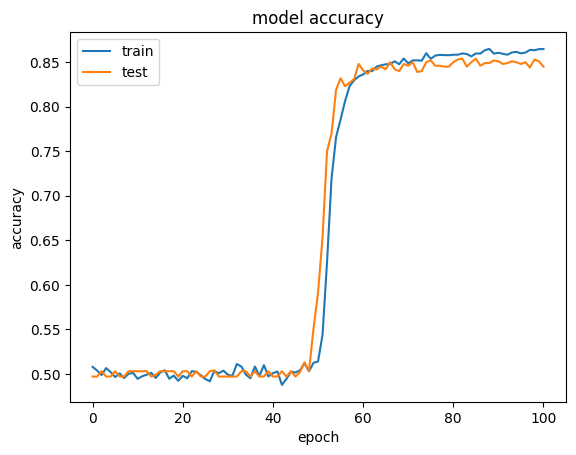

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
model.save('model_erath.h5')

In [54]:
pred_result = model.predict(([inputs_test, queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [55]:
pred_result.shape

(1000, 38)

In [56]:
pred_result[0]

array([2.77101703e-10, 2.08612350e-10, 1.12635200e-10, 2.31261024e-10,
       1.88042928e-10, 1.52290805e-10, 1.23324156e-10, 2.39905817e-10,
       9.94576097e-01, 1.05386595e-10, 2.76225737e-10, 2.29142053e-10,
       1.87537166e-10, 3.17213700e-10, 7.89870946e-11, 8.49210216e-11,
       8.88887436e-11, 1.56985439e-10, 2.27679556e-10, 5.11259979e-10,
       1.18698801e-10, 4.93895869e-10, 1.82260582e-10, 2.90743180e-10,
       7.44490233e-11, 1.76331533e-10, 1.93105323e-10, 5.42384526e-03,
       1.99494879e-10, 1.27415190e-10, 1.90617300e-10, 1.26056443e-10,
       6.41249762e-11, 3.38234940e-10, 2.79360840e-10, 1.88303484e-10,
       1.94398012e-10, 1.86931845e-10], dtype=float32)

In [57]:
index_word = {index: word for word, index in tokenizer.word_index.items()}

In [58]:
predictions = np.argmax(pred_result, axis=1)
pred_answers = [index_word[pred] for pred in predictions]

**Testing with a run time question**

In [59]:
my_story = "Daniel went to the office . Sandra dropped the football in the garden ."

In [60]:
my_story.split()

['Daniel',
 'went',
 'to',
 'the',
 'office',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [61]:
my_question = "Is the Football in the garden ?"

In [62]:
my_question.split()

['Is', 'the', 'Football', 'in', 'the', 'garden', '?']

In [64]:
mydata = [(my_story.split(), my_question.split(), 'no')]
print(mydata)

[(['Daniel', 'went', 'to', 'the', 'office', '.', 'Sandra', 'dropped', 'the', 'football', 'in', 'the', 'garden', '.'], ['Is', 'the', 'Football', 'in', 'the', 'garden', '?'], 'no')]


In [65]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [66]:
pred_result = model.predict([my_story, my_ques])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [67]:
val_max = np.argmax(pred_result[0])

In [68]:
# Highest predict probabilty.
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [69]:
k

'yes'

In [70]:
pred_result[0][val_max]

0.961423